<a href="https://colab.research.google.com/github/nuruzzaman99/Artificial-Intelligence/blob/main/Find_Nuruzzaman_Or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import keras
import shutil
import glob
import math

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

In [ ]:
#import data from drive

if not os.path.exists("./Nuruzzaman dataset.zip?dl=0"):
  !wget https://www.dropbox.com/s/k80nh3u3zwhu44a/Nuruzzaman_dataset.zip?dl=0

  !unzip /content/Nuruzzaman_dataset.zip?dl=0

else:
  print("The folder exsist")


--2021-11-09 16:00:39--  https://www.dropbox.com/s/k80nh3u3zwhu44a/Nuruzzaman_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k80nh3u3zwhu44a/Nuruzzaman_dataset.zip [following]
--2021-11-09 16:00:40--  https://www.dropbox.com/s/raw/k80nh3u3zwhu44a/Nuruzzaman_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a6723bccdd8bd9dee77a560b0.dl.dropboxusercontent.com/cd/0/inline/BZrvjWyk7xL1tfkDC5vvf73b7VMIzy2cShonwFt6xx0GilzLjojf23I_okEyGC1xuZCpU3Kj6rFKCNVG4Llji42v5EdDg1gB018NUa6mw-hA-EkTY1rl2B77SfK36MKsTEJ0aOzVZen1nT0GYGL4ydvk/file# [following]
--2021-11-09 16:00:40--  https://uc5a6723bccdd8bd9dee77a560b0.dl.dropboxusercontent.com/cd/0/inline/BZrvjWyk7xL1tfkDC5vvf73b7VMIzy2cShonwFt6xx0GilzLjojf23I

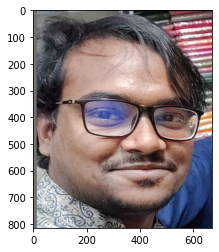

In [ ]:
img = image.load_img("/content/Nuruzzaman_dataset/yes/yes4.jpg")
plt.imshow(img)

In [ ]:
ROOT_DIR = "/content/Nuruzzaman_dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

#splite data into train and validation

def dataspliter(path, split):

  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                  size = (math.floor(split*number_of_images[dir])),
                                  replace=False):
        orginal = os.path.join(ROOT_DIR, dir, img)
        destination = os.path.join("./"+path, dir)
        shutil.copy(orginal, destination)
        os.remove(orginal)
  else:
    print("The "+path+" folder exsist")

In [ ]:
#train 70% and validation 30%

dataspliter("train", 0.70)
dataspliter("validation", 0.30)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
path = "/content/train"
train_data = train.flow_from_directory(path,
                                       target_size = (200, 200),
                                       batch_size = 3,
                                       class_mode = "binary")

Found 80 images belonging to 2 classes.


In [ ]:
path = "/content/validation"
val_data = validation.flow_from_directory(path,
                                       target_size = (200, 200),
                                       batch_size = 3,
                                       class_mode = "binary")

Found 34 images belonging to 2 classes.


In [ ]:
val_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = [200, 200, 3]))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer= RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])
#model.compile(optimizer= 'adam', loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [ ]:
model_fit = model.fit(train_data,
                      steps_per_epoch= 5,
                      epochs=30,
                      validation_data = val_data)

Epoch 1/30


KeyboardInterrupt: ignored

In [ ]:
path = "/content/242270150_2044734975692016_4908646333916868911_n.jpg"
img = image.load_img(path, target_size=(200, 200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.array(x)
pred = model.predict(images)
print(pred)

In [ ]:
import cv2
from PIL import Image

In [ ]:
if not os.path.exists("./haarcascade_frontalface_default.zip?dl=0"):
  !wget https://www.dropbox.com/s/uh3m03ae33lflcj/haarcascade_frontalface_default.zip?dl=0
  !unzip /content/haarcascade_frontalface_default.zip?dl=0

else:
  print("The file exsist")

In [ ]:
#select any pic with focused on face in the path to predict
#path = ""
def predict_face(im):
  resized_image = cv2.resize(im, (200,200), interpolation = cv2.INTER_AREA)
  plt.imshow(resized_image)
  plt.show()
  x = image.img_to_array(resized_image)
  x = np.expand_dims(x, axis=0)
  images = np.array(x)
  pred = model.predict(images)
  print(pred)

In [ ]:
import cv2
from PIL import Image

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('/content/183854789_219450012920729_6943238517479974185_n.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor = 1.25,
        minNeighbors = 3,
        minSize=(40, 40))

# Draw rectangle around the faces and crop for prediction
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h),(0, 0, 25) , 0)
    crop_img = img[y:y+h, x:x+w]
    predict_face(crop_img)